Выполнил: Петухов Алексей группа: 3821М1ФИкс


# Второе ДЗ. 
Обучить на ваших данных полносвязную (неглубокую) нейронную сеть. 
Попробуйте 1-2 скрытых слоя. 
Постройте графики зависимости ошибки на обучающей выборке и тестовой выборках от параметра alpha и от количества нейронов. 
Наблюдается ли переобучение/недообучение? 
Сделайте выводы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('data/train.csv')

In [3]:
data = train
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# features: 

1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera mega pixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8.  m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Megabytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: longest time that a single battery charge will last when you are
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi: Has wifi or not

Некоторые признаки числовые, некоторые принимают значения из ограниченного множества значений.

In [4]:
data = train
print(data.shape)
print(data.columns)

(2000, 21)
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [5]:
data.index

RangeIndex(start=0, stop=2000, step=1)

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Разделим данные и нормируем данные

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [20]:
X=data.drop('price_range',axis=1)
y=data['price_range']


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
N_test, _ = X_test.shape
print(N_test)

600


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Подбор _гипер_параметров
Подберем оптимальное значение параметра регуляризации alpha

In [23]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), solver = 'lbfgs', max_iter = 10000, 
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

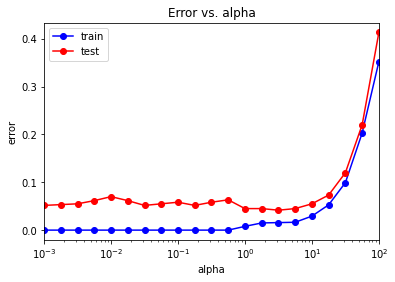

In [24]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим, как менялась метрика в зависимости от гиперпараметра:

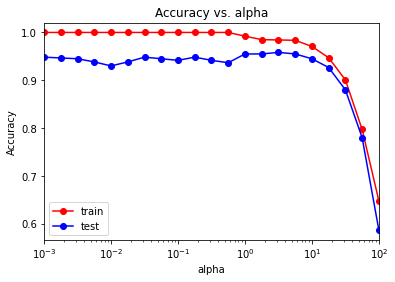

In [25]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Найдем минимальное значение ошибки и Оптимальное значение alpha:

In [26]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин. ошибка на обучающей выборке: "+str(min_train_err))
print("Мин. ошибка на тестовой выборке: "+str(min_test_err))

Мин. ошибка на обучающей выборке: 0.0
Мин. ошибка на тестовой выборке: 0.041666666666666664


In [29]:
alpha_opt = alpha_arr[test_err == min_test_err]

print("Оптимальное alpha: ", alpha_opt[0])

Оптимальное alpha:  3.1622776601683795


Классификатор при найденном оптимальном значении alpha. Повторим обучение.

In [31]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('train error:', np.mean(y_train != y_train_pred))
print('test error:', np.mean(y_test != y_test_pred))

train error: 0.015714285714285715
test error: 0.041666666666666664


## Матрица рассогласования:

In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[142   4   0   0]
 [  2 136   9   0]
 [  0   1 161   1]
 [  0   0   8 136]]


Найдем оптимальное количество нейронов 1-го скрытого слоя при оптимальном значении alpha:

In [37]:
hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), solver = 'lbfgs', max_iter = 10000,
                              activation = 'logistic', random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

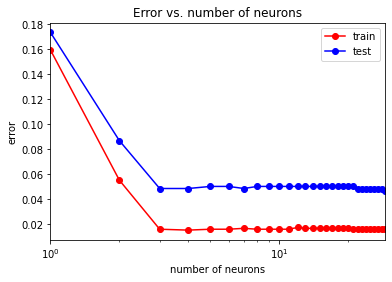

In [38]:
plt.semilogx(hidden_layer, train_err, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()

Рассмотрим, как менялась точность в зависимости от количества нейронов:

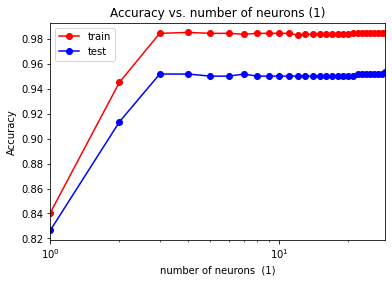

In [41]:
plt.semilogx(hidden_layer, train_acc, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of neurons (1)')
plt.xlabel('number of neurons  (1)')
plt.ylabel('Accuracy')
plt.legend()

Посчитаем минимальное значение ошибки:

In [44]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("train error: ", min_train_err)
print("test error: ", min_test_err)

train error:  0.015
test error:  0.04666666666666667


Оптимальное значение количества нейронов 1-го слоя:

In [47]:
neuron_opt_1 = hidden_layer[test_err == min_test_err]
neuron_opt_1 = neuron_opt_1[0]

print("Оптимальное количество нейронов 1-го слоя:", neuron_opt_1)

Оптимальное количество нейронов 1-го слоя: 29


Добавим второй слой и определим количество нейронов 2-го скрытого слоя при оптимальном значении alpha и оптимальном количестве нейронов 1-го скрытого слоя при том же оптимальном alpha:

In [48]:
hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron), solver = 'lbfgs', 
                              max_iter = 10000, activation = 'logistic', random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    

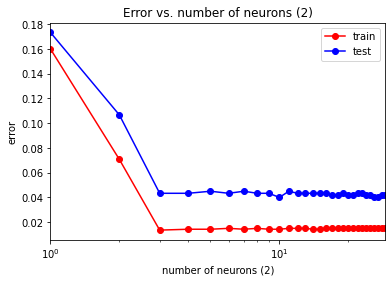

In [49]:
plt.semilogx(hidden_layer, train_err, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of neurons (2)')
plt.xlabel('number of neurons (2)')
plt.ylabel('error')
plt.legend()

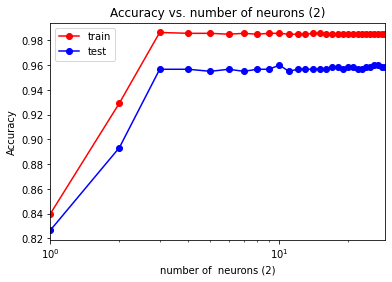

In [50]:
plt.semilogx(hidden_layer, train_acc, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of neurons (2)')
plt.xlabel('number of  neurons (2)')
plt.ylabel('Accuracy')
plt.legend()

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("train error:", min_train_err)
print("test error:",min_test_err)

train error: 0.013571428571428571
test error: 0.04


In [54]:
neuron_opt_2 = hidden_layer[test_err == min_test_err]
neuron_opt_2 = neuron_opt_2[0]

print("Оптимальное количество нейронов 2-го слоя:", neuron_opt_2)

Оптимальное количество нейронов 2-го слоя: 10


## Наконец обучим нейронную сеть с найденными оптимальными значениями alpha и количества нейронов 1-го слоя:

In [57]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1,), solver = 'lbfgs', max_iter = 10000, 
                          activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("train error:",err_train)
print("test error:",err_test)

train error: 0.015714285714285715
test error: 0.04666666666666667


## Теперь обучим нейронную сеть с найденными оптимальными значениями alpha и количества нейронов 1-го и 2-го слоя:

In [59]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron_opt_2),
                          solver = 'lbfgs', max_iter = 10000, activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("train error:", err_train)
print("test error:", err_test)

train error: 0.014285714285714285
test error: 0.04


Вывод.

Были получены следующие результаты. В случае, если параметр alpha равен 3.3.1622776601683795, количество нейронов 1-го скрытого слоя = 29 , а количество нейронов 2-го скрытого слоя = 10, то удается достигнуть наименьшей ошибки на тестовой выборке - всего 0.04 (или 4%). Этот результат получился лучше, в сравнении с первой домашней работой, где использовались другие классификаторы, рассмотренных в данной работе ранее( knn - 6.7% RandomForestClassifier - 13%).